In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


# IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geopandas.tools
from shapely.geometry import Point

In [3]:
df=pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [5]:
df.head()


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


# PREPROCESSING

In [6]:
df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [7]:
df['LandMaxTemperature'] = df['LandMaxTemperature'].fillna(0)
df['LandMinTemperature'] = df['LandMinTemperature'].fillna(0)

In [8]:
# Convert the 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])
# Create a 'Year' column for grouping
df['Year'] = df['dt'].dt.year

In [9]:
columns_to_replace = [
    'LandMaxTemperature',
    'LandMinTemperature',
    'LandMaxTemperatureUncertainty',
    'LandAverageTemperature',
    'LandAverageTemperatureUncertainty',
    'LandMinTemperatureUncertainty',
    'LandAndOceanAverageTemperature',
    'LandAndOceanAverageTemperatureUncertainty'
]

# Replace NaN values with 0 for these columns
df[columns_to_replace] = df[columns_to_replace].fillna(0)

In [10]:
df.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
Year                                         0
dtype: int64

In [11]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
0,1750-01-01,3.034,3.574,0.0,0.0,0.0,0.0,0.0,0.0,1750
1,1750-02-01,3.083,3.702,0.0,0.0,0.0,0.0,0.0,0.0,1750
2,1750-03-01,5.626,3.076,0.0,0.0,0.0,0.0,0.0,0.0,1750
3,1750-04-01,8.490,2.451,0.0,0.0,0.0,0.0,0.0,0.0,1750
4,1750-05-01,11.573,2.072,0.0,0.0,0.0,0.0,0.0,0.0,1750


# VISUALIZATION

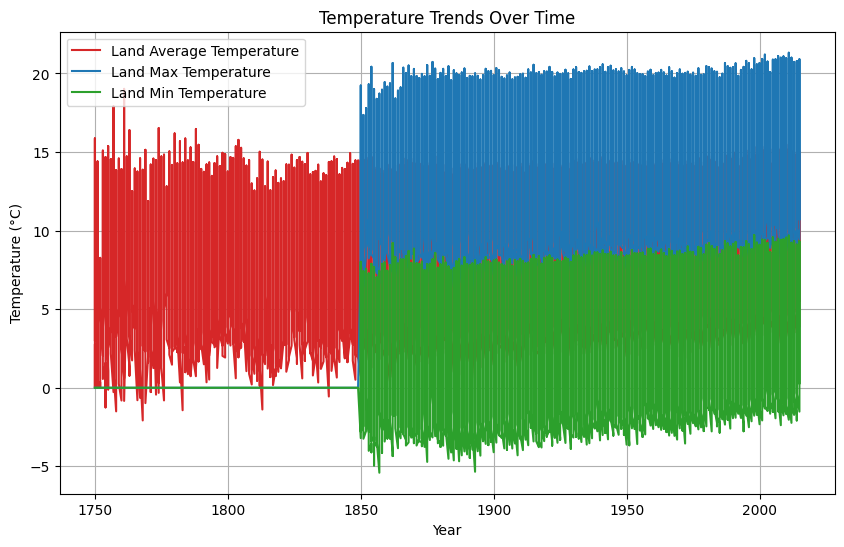

In [12]:
plt.figure(figsize=(10, 6))

# Plotting temperature variables
plt.plot(df['Year'], df['LandAverageTemperature'], label='Land Average Temperature', color='tab:red')
plt.plot(df['Year'], df['LandMaxTemperature'], label='Land Max Temperature', color='tab:blue')
plt.plot(df['Year'], df['LandMinTemperature'], label='Land Min Temperature', color='tab:green')

plt.title('Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


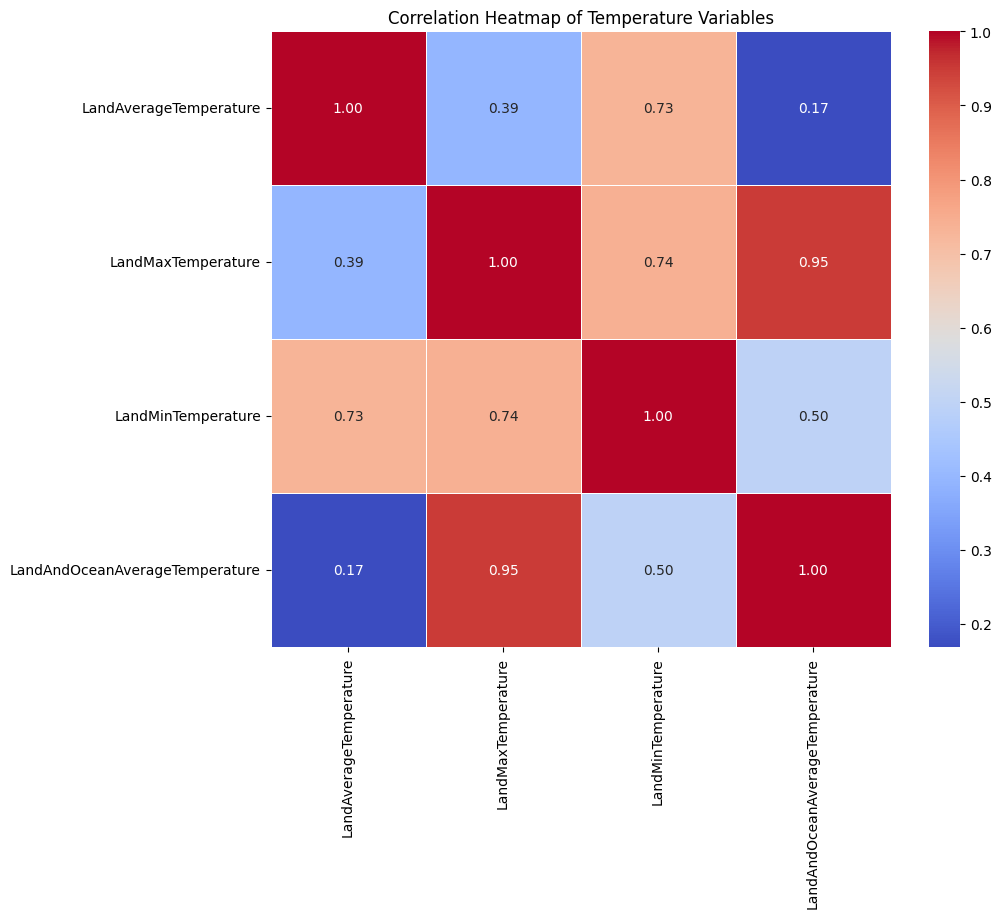

In [13]:
plt.figure(figsize=(10, 8))

# Selecting only the columns related to temperature for correlation
temperature_columns = [
    'LandAverageTemperature', 
    'LandMaxTemperature', 
    'LandMinTemperature', 
    'LandAndOceanAverageTemperature'
]

# Compute the correlation matrix
corr_matrix = df[temperature_columns].corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Temperature Variables')
plt.show()


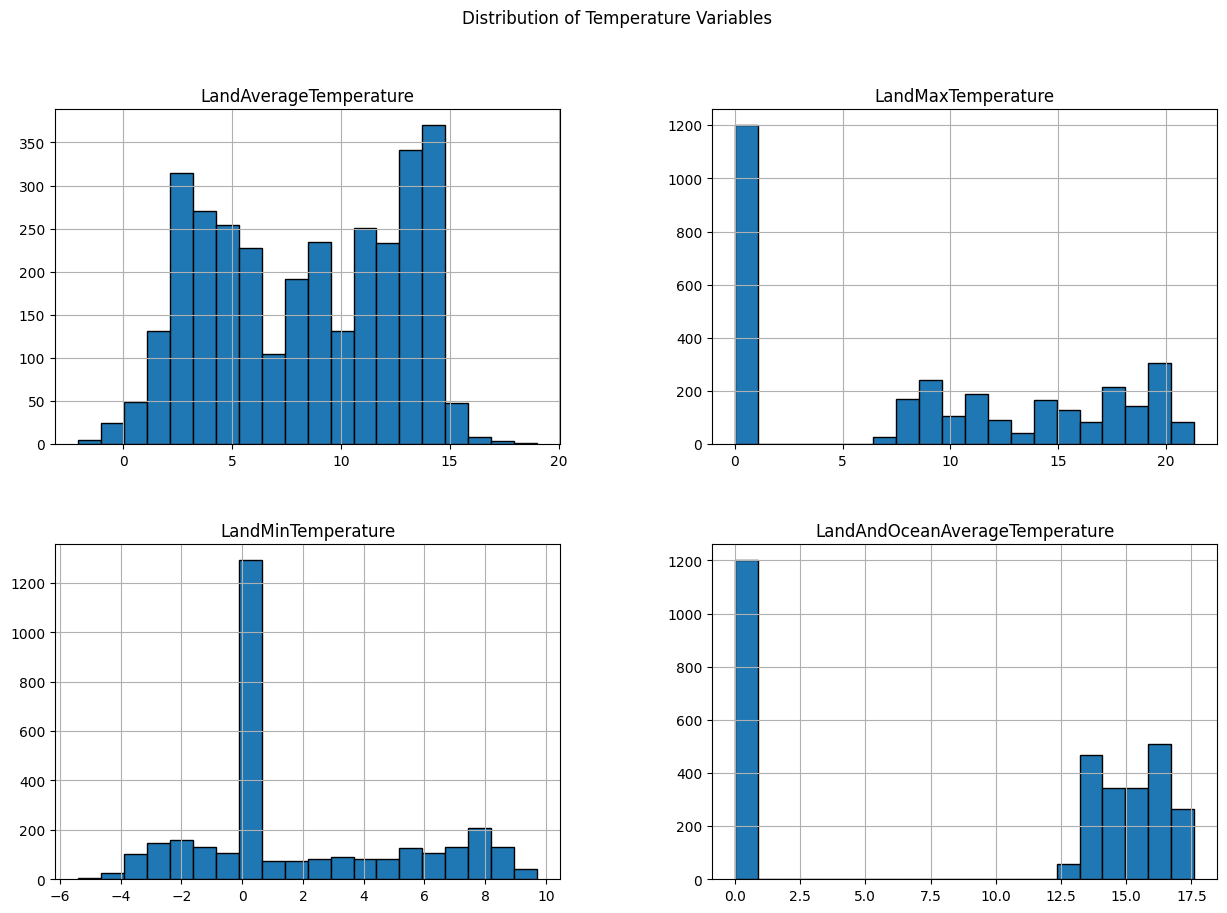

In [14]:
df[temperature_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Temperature Variables')
plt.show()


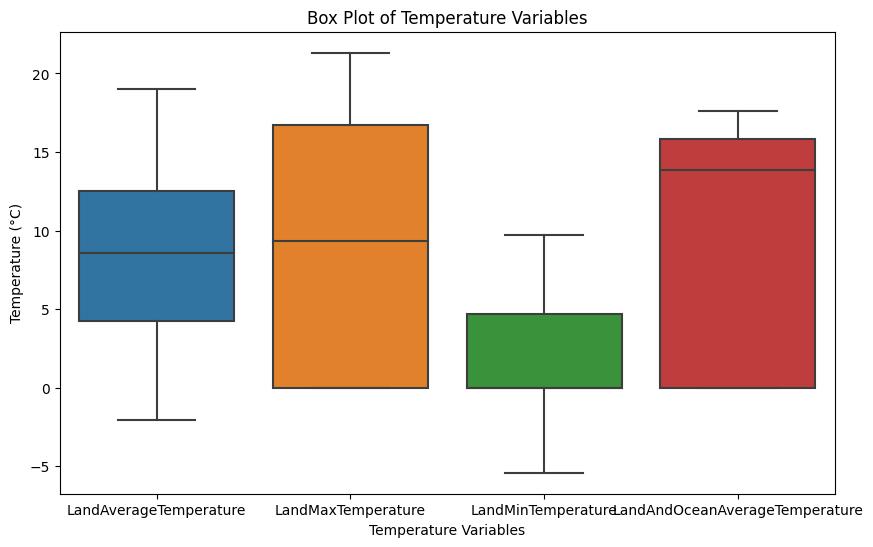

In [15]:
plt.figure(figsize=(10, 6))

# Create a boxplot for each temperature column
sns.boxplot(data=df[temperature_columns])

plt.title('Box Plot of Temperature Variables')
plt.xlabel('Temperature Variables')
plt.ylabel('Temperature (°C)')
plt.show()


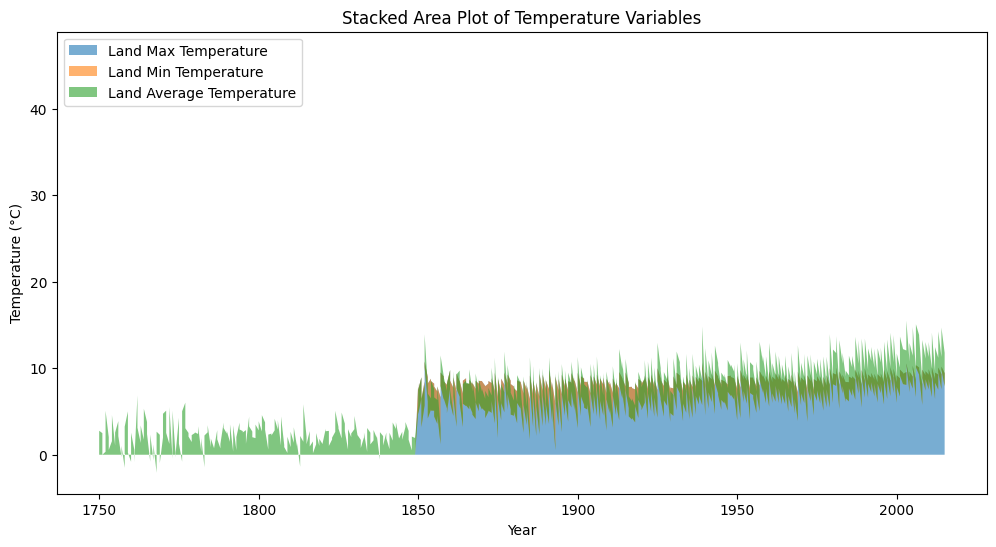

In [16]:
plt.figure(figsize=(12, 6))

# Stack the area plots for different temperature variables
plt.stackplot(df['Year'], df['LandMaxTemperature'], df['LandMinTemperature'], df['LandAverageTemperature'],
              labels=['Land Max Temperature', 'Land Min Temperature', 'Land Average Temperature'],
              alpha=0.6)

plt.title('Stacked Area Plot of Temperature Variables')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper left')
plt.show()


/tmp/ipykernel_32/1338267023.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['LandAverageTemperature'], shade=True, color='blue', label='Land Average Temperature')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_32/1338267023.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['LandMaxTemperature'], shade=True, color='red', label='Land Max Temperature')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version.

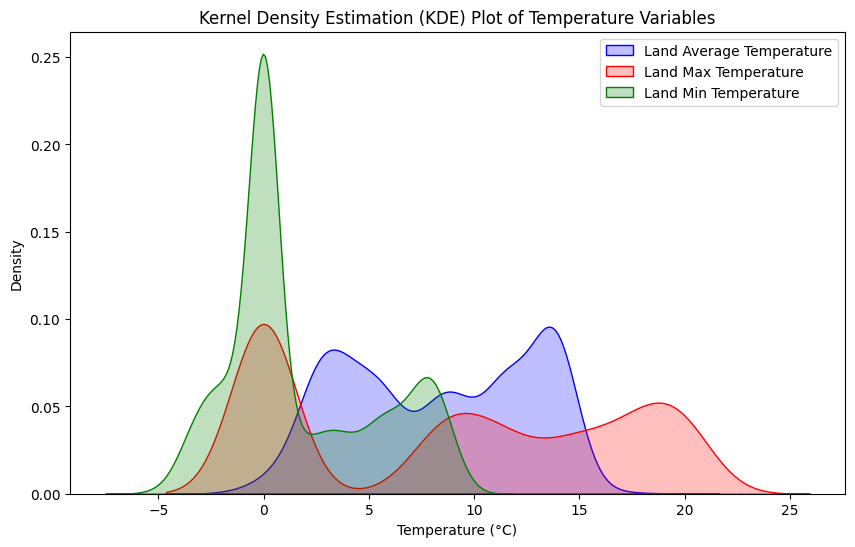

In [17]:
plt.figure(figsize=(10, 6))

# KDE plot for Land Average Temperature
sns.kdeplot(df['LandAverageTemperature'], shade=True, color='blue', label='Land Average Temperature')
sns.kdeplot(df['LandMaxTemperature'], shade=True, color='red', label='Land Max Temperature')
sns.kdeplot(df['LandMinTemperature'], shade=True, color='green', label='Land Min Temperature')

plt.title('Kernel Density Estimation (KDE) Plot of Temperature Variables')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend()
plt.show()


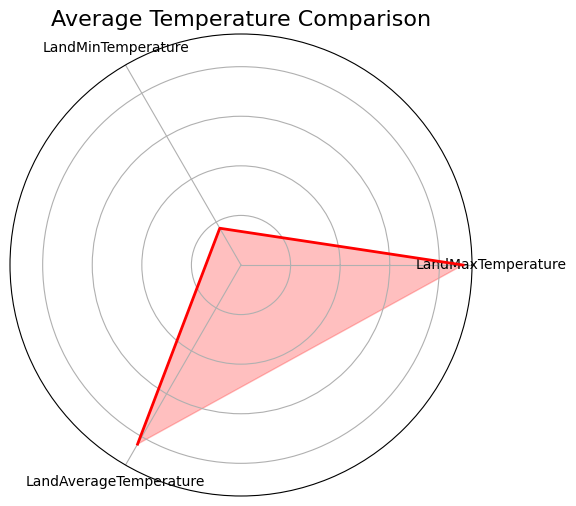

In [18]:
import numpy as np

def radar_chart(data, labels, title):
    # Number of variables
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Create a figure
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot data
    ax.fill(angles, data, color='red', alpha=0.25)
    ax.plot(angles, data, color='red', linewidth=2)  # Line for data

    # Labels and title
    ax.set_yticklabels([])  # Hide y-axis labels
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)
    plt.title(title, size=16)

    plt.show()

# Example of data for the radar chart
labels = ['LandMaxTemperature', 'LandMinTemperature', 'LandAverageTemperature']
data = [
    df['LandMaxTemperature'].mean(),
    df['LandMinTemperature'].mean(),
    df['LandAverageTemperature'].mean()
]

radar_chart(data, labels, 'Average Temperature Comparison')
